# 歡迎來到時間序列(Time Series)！ #

**預測**可能是機器學習在現實世界中最常見的應用。企業預測產品需求，政府預測經濟和人口增長，氣象學家預測天氣。對未來事物的理解是科學、政府和行業（更不用說我們的個人生活！）的迫切需求，這些領域的從業者越來越多地應用機器學習來解決這一需求。

時間序列預測是一個歷史悠久的廣闊領域。本課程側重於將現代機器學習方法應用於時間序列數據，以產生最準確的預測。本課程中的課程受到過去 Kaggle 預測比賽中獲勝解決方案的啟發，但只要準確預測成為優先事項，就適用。

完成本課程後，您將知道如何：
- 對主要時間序列成分（*趨勢*、*季節*和*週期*）進行建模的工程功能，
- 用多種*時間序列圖*可視化時間序列，
- 創建預測*混合(hybrids)*，結合互補模型的優勢
- 使機器學習方法適應各種預測任務。

作為練習的一部分，您將有機會參加我們的 [店鋪銷售 - 時間序列預測](https://www.kaggle.com/c/29781) 入門比賽。在本次比賽中，您的任務是預測 *Corporación Favorita*（一家大型厄瓜多爾雜貨零售商）在近 1800 個產品類別中的銷售額。

# 什麼是時間序列？ #

預測的基本對像是**時間序列**，它是隨時間記錄的一組觀察結果。在預測應用程序中，通常以固定頻率記錄觀察結果，例如每天或每月。

In [5]:
import pandas as pd

df = pd.read_csv(
    "./data_set/book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


該序列記錄了一家零售店 30 天內精裝書的銷售數量。我們有一列觀察結果為“Hardcover”，時間索引為“Date”。

# 時間序列線性迴歸 #

在本課程的第一部分，我們將使用線性迴歸算法來構建預測模型。線性迴歸在實踐中被廣泛使用，並且自然地適應複雜的預測任務。

**線性迴歸(Linear Regression)**算法學習如何從其輸入特徵中得出加權和。對於兩個功能，我們將擁有：

```
目標 = weight_1 * feature_1 + weight_2 * feature_2 + 偏差
```

在訓練期間，迴歸算法會學習最適合“目標”的參數`weight_1`、`weight_2`和`bias`的值。 （這個算法通常被稱為*普通最小二乘(ordinary least squares)*，因為它選擇最小化目標和預測之間的平方誤差的值。）權重也稱為*迴歸係數(regression coefficients)*，而“偏差(bias)”也稱為*截距*，因為它告訴您此函數的圖形與 y 軸相交的位置。

### 時間步長特徵

時間序列有兩種獨特的特徵：時間步長(time-step features)特徵和滯後特徵(lag features)。

時間步長特徵是我們可以直接從時間索引中得出的特徵。最基本的時間步長特徵是**time dummy**，它從頭到尾計算序列中的時間步長。

In [7]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


具有時間虛擬變量的線性迴歸產生模型：

```
目標 = 權重 * 時間 + 偏差
```

然後，時間dummy模型讓我們將曲線擬合到 *time plot* 中的時間序列，其中 `Time` 形成 x 軸。

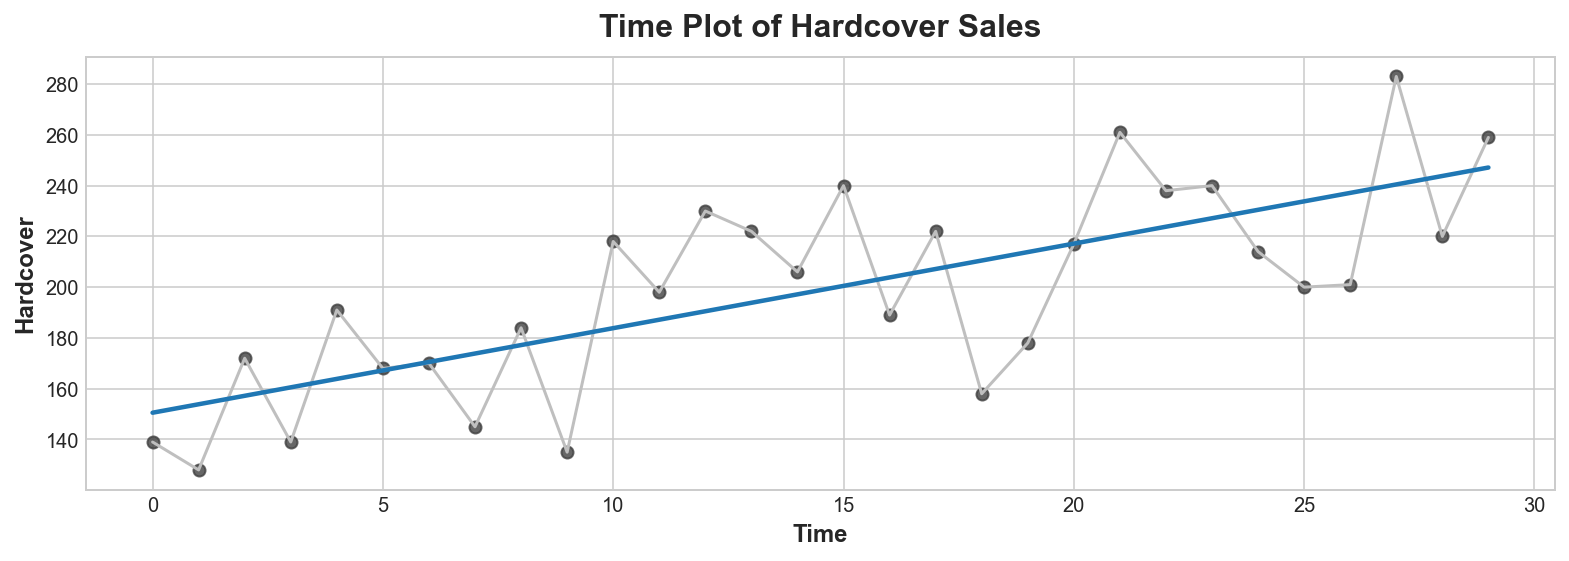

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

時間步長功能可模擬**時間依賴性**。 如果一個系列的值可以從它們發生的時間預測出來，那麼它就是時間相關的。 在*精裝銷售*序列中，我們可以預測本月晚些時候的銷售量通常高於本月早些時候的銷售量。

### 滯後特徵(Lag features)

為了製作**滯後特徵**，我們改變了目標系列的觀察結果，使它們看起來發生在較晚的時間。 在這裡，我們創建了一個 1 步滯後特徵，儘管也可以進行多步移動。

In [9]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


具有滯後特徵的線性迴歸產生模型：

```
目標 = 權重 * 滯後 + 偏差
```

因此，滯後特徵讓我們可以將曲線擬合到*滯後圖*，其中序列中的每個觀察值都針對前一個觀察值繪製。

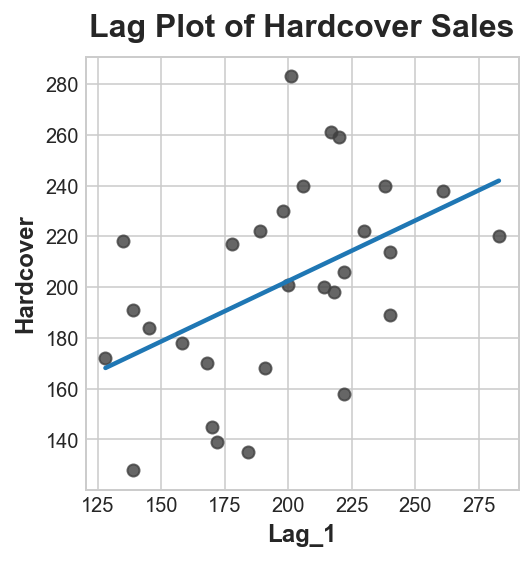

In [15]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');
# 今天跟隔天的散點圖

您可以從滯後圖中看到，一天的銷售額（“精裝書”）與前一天的銷售額（“Lag_1”）相關。當您看到這樣的關係時，您就會知道延遲功能會很有用。

更一般地說，滯後功能可讓您模擬**虛列依賴(serial dependence)**。當可以從先前的觀察中預測觀察時，時間序列具有序列依賴性。在*精裝銷售*中，我們可以預測一天的高銷售額通常意味著第二天的高銷售額。

---

使機器學習算法適應時間序列問題主要是關於具有時間索引和滯後的特徵工程。對於大部分課程，我們使用線性迴歸是為了簡單，但無論您為預測任務選擇哪種算法，這些功能都會很有用。

# 示例 - 隧道流量 #

*Tunnel Traffic* 是一個時間序列，描述了從 2003 年 11 月到 2005 年 11 月每天通過瑞士巴雷格隧道的車輛數量。在這個例子中，我們將進行一些練習，將線性回歸應用於時間步長特徵和滯後特徵.

In [24]:

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("./data_set/")
# 通過將索引設置為日期列，在 Pandas 中創建時間序列。 我們在加載數據時使用 `parse_dates` 將“Day”解析為日期類型。
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569
...,...,...
742,2005-11-12,104646
743,2005-11-13,94424
744,2005-11-14,112165
745,2005-11-15,114296


In [25]:
tunnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [22]:
# 默認情況下，Pandas 使用 dtype `Timestamp` 創建一個 `DatetimeIndex`
#（相當於 `np.datetime64`，將時間序列表示為在單個時刻進行的測量序列。
# 另一方面，`PeriodIndex` 表示時間 series 作為在一段時間內累積的數量序列。
# 週期通常更容易使用，所以這就是我們將在本課程中使用的。
tunnel = tunnel.set_index("Day")
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


### 時間步長特徵

如果時間序列沒有任何缺失的日期，我們可以通過計算序列的長度來創建時間dummy。

In [26]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4


擬合線性迴歸模型的過程遵循 scikit-learn 的標準步驟。

In [27]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# 將擬合值儲存為與訓練數據具有相同時間索引的時間序列
y_pred = pd.Series(model.predict(X), index=X.index)

實際創建的模型（大約）是：`Vehicles = 22.5 * Time + 98176`。 繪製隨時間變化的擬合值向我們展示瞭如何將線性回歸擬合到時間虛擬變量創建由該方程定義的趨勢線。

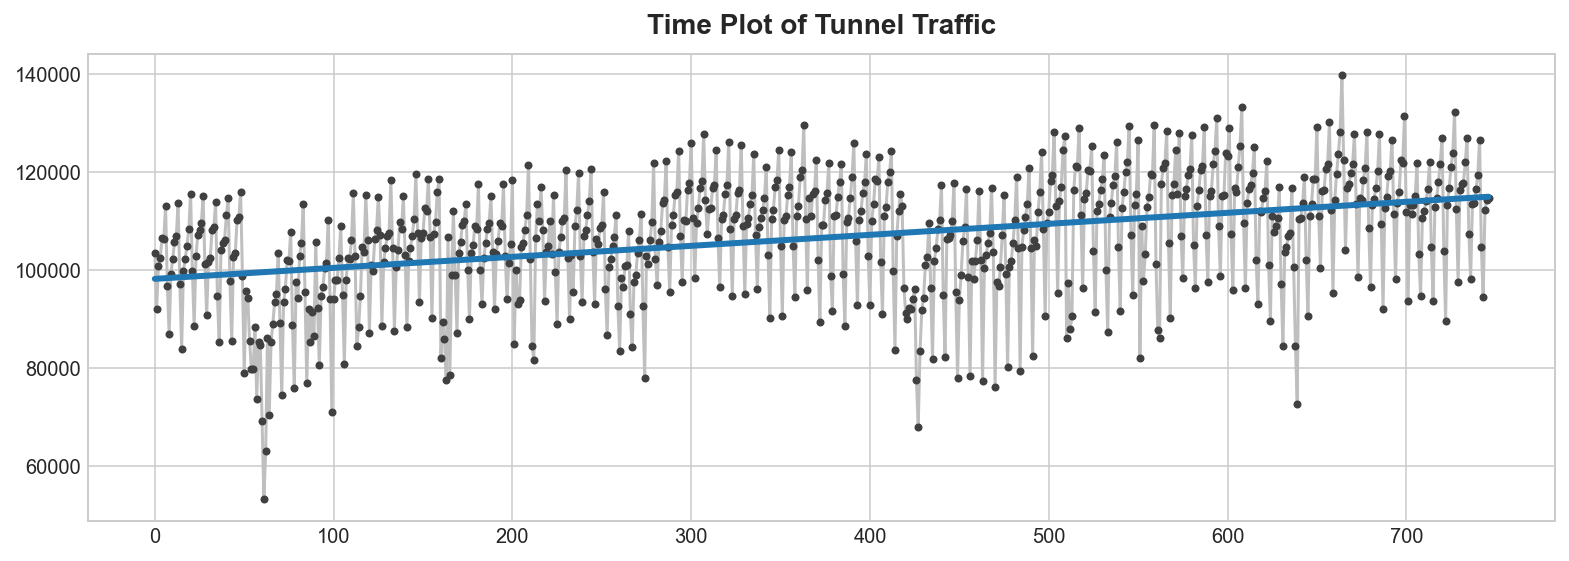

In [32]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

### 滯後功能

Pandas 為我們提供了一個簡單的方法來延遲一個系列，`shift` 方法。

In [34]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,Day,NumVehicles,Time,Lag_1
0,2003-11-01,103536,0,NaN
1,2003-11-02,92051,1,103536.0
2,2003-11-03,100795,2,92051.0
3,2003-11-04,102352,3,100795.0
4,2003-11-05,106569,4,102352.0


創建滯後特徵時，我們需要決定如何處理產生的缺失值。 填充它們是一種選擇，可能使用 0.0 或使用第一個已知值“回填”。 相反，我們將**只刪除缺失的值**，並確保從相應日期刪除目標中的值。

In [44]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target(y取x有的index)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [45]:
y_pred

1      104961.799284
2       98840.684037
3      103500.939302
4      104330.767464
5      106578.285356
           ...      
742    117280.776890
743    105553.391615
744    100105.412508
745    109560.763451
746    110696.514134
Length: 746, dtype: float64

滯後圖向我們展示了我們能夠很好地擬合一天車輛數量與前一天車輛數量之間的關係。

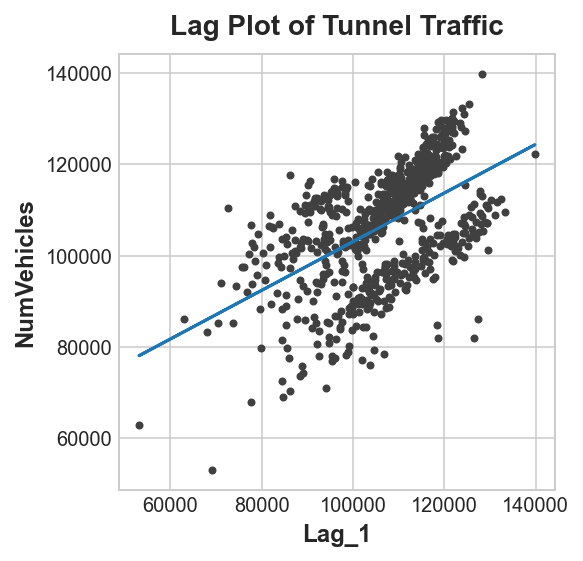

In [46]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

這個來自滯後特徵的預測意味著我們可以在多大程度上預測跨時間的序列？ 下面的時間圖向我們展示了我們的預測現在如何回應該系列最近的行為。

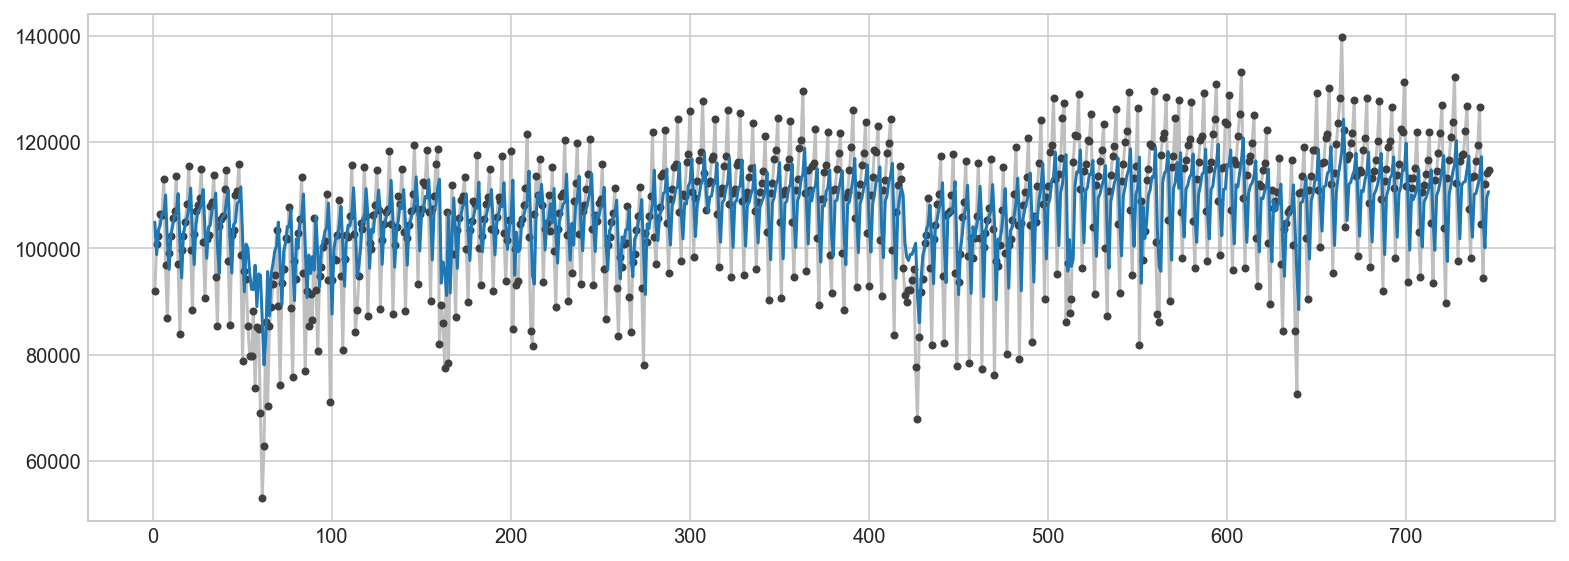

In [47]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

最好的時間序列模型通常會包含一些時間步長特徵和滯後特徵的組合。 在接下來的課程中，將學習如何使用本課中的特徵作為起點，對時間序列中最常見的模式進行建模。